In [1]:
from twython import Twython
import json
import csv

credentials = {}
credentials["API_KEY"] = "kfMHh8BuUXMCQ9S57eHlZPtp3"
credentials["API_SECRET"] = "YBBa1e6czkDK30KOpdMPN20QCWao2M8ONvCodfnH8gWW1AOXIu"
credentials["ACCESS_TOKEN"] = "1501925600105218050-lOCbvbbF4Ikoy9ublZQi4NAiGsAN84"
credentials["ACCESS_TOKEN_SECRET"] = "cS5qbsBa9IvF6ORoKs6UZtGz5KbLe0nY9lINwWGeK35ao"


with open("credentials.json", "w") as file:
    json.dump(credentials, file)








In [2]:
# AUTHENTICATION OF TWITTER TOKENS OAUTH
from twython import Twython
import json

credentials = {}
with open("credentials.json", "r") as file:
    credentials = json.load(file)

twitter = Twython(app_key=credentials["API_KEY"],
                 app_secret=credentials["API_SECRET"], 
                 oauth_token=credentials["ACCESS_TOKEN"],
                 oauth_token_secret=credentials["ACCESS_TOKEN_SECRET"])


In [3]:

class Twitter_Utility:

    def __init__(self):
        self.results = {}

    def process_tweet(self, data):
        tweet = {}
        tweet["location"] = data["user"]["location"]
        tweet["text"] = data["text"]
        tweet["client_platform"] = data["source"]
        tweet["hashtags"] = [hashtag["text"] for hashtag in data["entities"]["hashtags"]]
        return tweet


    def csv_set_header(self, tweet):
         with open("saved_tweets.csv", "a", encoding="utf-8",newline="") as file:
            header = [key for key in self.process_tweet(tweet)]
            csv_writer = csv.writer(file)
            csv_writer.writerow(header)
        
    def save_to_csv(self, tweet):
        with open("saved_tweets.csv", "a", encoding="utf-8", newline="") as file:
            csv_writer = csv.writer(file)
            tweet_content = [tweet[key] for key in tweet]
            csv_writer.writerow(tweet_content)
            return tweet_content

    def search_tweet(self, search_query,count,lang="en"):
        results = twitter.search(q=search_query, count= count,lang=lang)   
        self.results = results
        return results
        
    
    def save_tweets(self):
        if self.results.get("statuses"):
                self.csv_set_header(self.results["statuses"][0])
                for result in self.results["statuses"]:
                    tweet = self.process_tweet(result) 
                    self.save_to_csv(tweet)




twitter_util = Twitter_Utility()
#twitter_util.search_tweet("Ukraine", count=100)
#twitter_util.save_tweets()

In [4]:
# TWITTER WORLDWIDE TRENDS
import pandas as pd

def twitter_trends_url(url, id):
    url = twitter.construct_api_url(api_url=url, id = id)
    print(url)
    return url

response = twitter._request(url= twitter_trends_url("https://api.twitter.com/1.1/trends/place.json",id=23424975),
                    json_encoded=True,
                    method="GET")

with open("worldtrends.json", "w") as file:
        json.dump(response, file)


top_15_trends_list = list(response[0]["trends"])[0:15]

top_15_trends_list
df = pd.DataFrame(columns=["name","tweet_volume","url","query"])


# https://stackoverflow.com/questions/10715965/create-a-pandas-dataframe-by-appending-one-row-at-a-time

for index in range(len(top_15_trends_list)):
    df.loc[index] = [top_15_trends_list[index]["name"], 
                        top_15_trends_list[index]["tweet_volume"], 
                        top_15_trends_list[index]["url"],
                        top_15_trends_list[index]["query"]
                        ] 



df
                        














https://api.twitter.com/1.1/trends/place.json?id=23424975


,name,tweet_volume,url,query
0,#ThursdayVibes,None,http://twitter.com/search?q=%23ThursdayVibes,%23ThursdayVibes
1,Jermain,None,http://twitter.com/search?q=Jermain,Jermain
2,Infosys,11299,http://twitter.com/search?q=Infosys,Infosys
3,#JohnsonOut59,11496,http://twitter.com/search?q=%23JohnsonOut59,%23JohnsonOut59
4,#ThursdayThoughts,24259,http://twitter.com/search?q=%23ThursdayThoughts,%23ThursdayThoughts
5,Sunak,195289,http://twitter.com/search?q=Sunak,Sunak
6,hobi,301358,http://twitter.com/search?q=hobi,hobi
7,#JeremyVine,None,http://twitter.com/search?q=%23JeremyVine,%23JeremyVine
8,#popmaster,None,http://twitter.com/search?q=%23popmaster,%23popmaster
9,Mumsnet,None,http://twitter.com/search?q=Mumsnet,Mumsnet


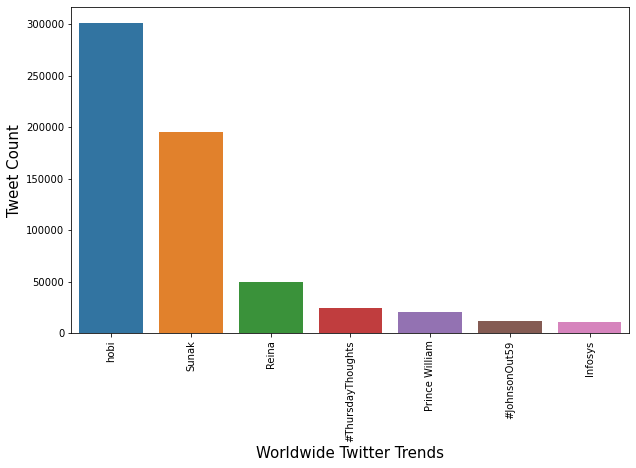

In [5]:
#################### BARPLOT FOR WORLDWIDE TRENDS

import seaborn as sns
import matplotlib.pyplot as plt


# type(df["tweet_volume"])
df = df.dropna()

plt.figure(figsize=(10,6))
sorted_df = df.sort_values(['tweet_volume'], ascending=False).reset_index(drop=True)
sns.barplot(data=sorted_df,
             x="name", 
             y="tweet_volume",
             order=sorted_df.name)
plt.xlabel("Worldwide Twitter Trends", size= 15)             
plt.ylabel("Tweet Count", size= 15)             
plt.xticks(rotation=90)
plt.show()







In [6]:

#trend_url = df[df["name"]=="Ted Cruz"].url.to_string(index=False)
#trend_tweets = twitter_util.search_tweet(sorted_df.iat[0,0], count=10)

trend_url = df[df["name"]=="Ted Cruz"].url.to_string(index=False)
# trend_url

top_trend_on_twitter_query = sorted_df.iat[0,3]
trend_tweets = twitter_util.search_tweet(top_trend_on_twitter_query,count=100)
twitter_util.results = trend_tweets
twitter_util.save_tweets()

with open("ran.json", "a") as file:
    json.dump(trend_tweets,file)



['iPhone', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'iPhone', 'Web App', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'Android', 'iPhone', 'iPhone', 'Web App', 'Android', 'iPhone', 'iPhone', 'iPhone', 'Android', 'iPhone', 'Android', 'iPhone', 'iPhone', 'Android', 'iPhone', 'iPhone', 'Android', 'Web App', 'iPhone', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'iPhone', 'iPhone', 'Web App', 'Android', 'iPhone', 'Android', 'iPhone', 'iPhone', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'iPhone', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'iPhone', 'Web App', 'Android', 'Android', 'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android', 'Android', 'Android', 'Andr

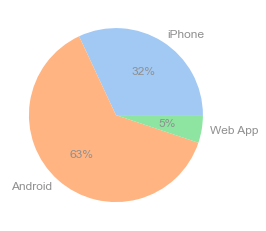

In [7]:
################# PIECHART FOR DEVICES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
import itertools

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12


# labels = [w for w,k in itertools.groupby(twitter_client_system , lambda x : x)]
from pathlib import Path
import re
tweets_trending_file_path = Path() / "saved_tweets.csv"
trending_tweets = pd.read_csv(tweets_trending_file_path)


import re
client_system = trending_tweets["client_platform"].tolist()

#print(client_system)
twitter_client_system = []
for i in client_system:
    match = re.search(r'Android|iPhone|Web App',i)
    if match is not None:
      device = match.group()
      twitter_client_system.append(device)

print(twitter_client_system) 


counts = dict()
for i in twitter_client_system:
  counts[i] = counts.get(i, 0) + 1


labels = list(counts.keys())
data = list(counts.values())
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

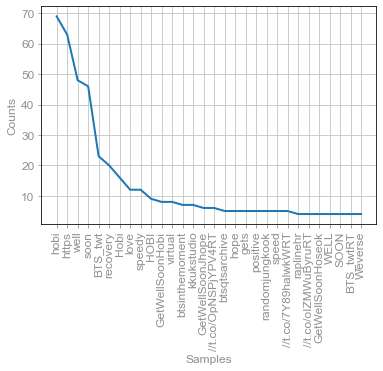

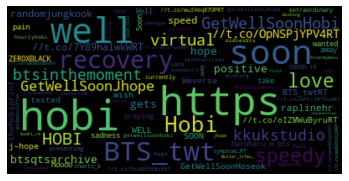

In [8]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

path_to_file = Path() / "saved_tweets.csv"

twitter_data = pd.read_csv(path_to_file)
tweets = twitter_data[["text"]]


tweets = twitter_data["text"].to_list()

document = ""
for tweet in tweets:
    document += tweet


document



tweet_tokens = nltk.word_tokenize(document)

stopwords = set(stopwords.words("english"))

tweet_tokens


filtered_tweet_text = [w for w in tweet_tokens if w not in stopwords]

wordcloud = WordCloud()

tweet_freq_dist = nltk.FreqDist(filtered_tweet_text)

sorted(tweet_freq_dist,key=tweet_freq_dist.__getitem__,reverse=True)

large_words = dict([(k,v) for (k,v) in tweet_freq_dist.items() if len(k) > 3])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30,cumulative=False)

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate_from_frequencies(frequency_dist)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()








In [9]:
results = twitter.search(q=top_trend_on_twitter_query, count=100)

r = results["statuses"]

tweet_locations = [tweet for tweet in r if tweet["place"] is not None]
print(tweet_locations)

with open("sample.json", "w") as file:
    json.dump(r,file)

top_trend_on_twitter_query


[]


'hobi'